In [47]:
import numpy as np
import matplotlib.pyplot as plt
import adaptivealgo.cli.policy_iter as pi
import adaptivealgo.cli.simulate_policy as sim
from adaptivealgo.lib.simulator import Simulator

In [48]:
n_links = 2
f_thresh = 0.4
actions = [0.1, 0.2]
alpha = 1.0
gamma = 0.2
tol = 1e-6

n_episodes = 10_000

policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(f"Policy iteration took {i} iterations")
print(f"Optimal policy: {policy['policy']}")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
samples = sim.gen_policy_samples(simulator, n_episodes)

suboptimal_policy = {key: 1 - value for key, value in policy["policy"].items()}
simulator = Simulator(suboptimal_policy, n_links, f_thresh, actions, alpha, gamma)
suboptimal_samples = sim.gen_policy_samples(simulator, n_episodes)

print(f"Mean runtime optimal policy: {int(np.mean(samples))} seconds")
print(f"Mean runtime suboptimal policy: {int(np.mean(suboptimal_samples))} seconds")

Policy iteration took 2 iterations
Optimal policy: {'[]': 1, '[1]': 1, '[2]': 1, '[3]': 1, '[4]': 1, '[5]': 1, '[6]': 1, '[7]': 1}
Mean runtime optimal policy: 12 seconds
Mean runtime suboptimal policy: 31 seconds


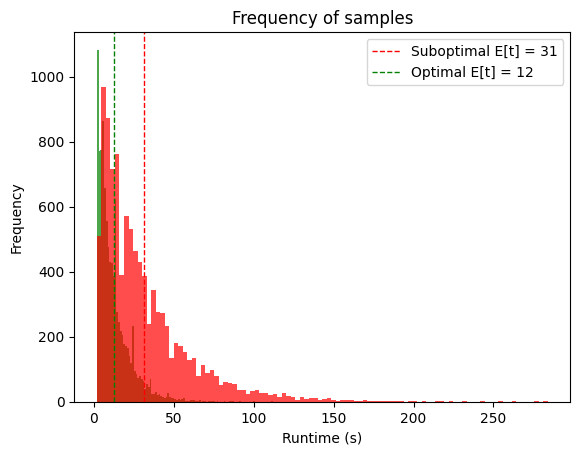

In [49]:
plt.hist(samples, bins=100, color='g', alpha=0.7)
plt.hist(suboptimal_samples, bins=100, color='r', alpha=0.7)

plt.axvline(np.mean(suboptimal_samples), color='r', linestyle='--', linewidth=1)
plt.axvline(np.mean(samples), color='g', linestyle='--', linewidth=1)

plt.title('Frequency of samples')
plt.xlabel('Runtime (s)')
plt.ylabel('Frequency')

plt.legend([f'Suboptimal E[t] = {int(np.mean(suboptimal_samples))}', f'Optimal E[t] = {int(np.mean(samples))}'])
plt.show()